<a href="https://colab.research.google.com/github/ramphelenoko/hello-world/blob/master/Xente_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
xe_var_def = pd.read_csv('Xente_Variable_Definitions.csv')

In [11]:
xe_var_def

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [0]:
df = pd.read_csv('training.csv')

In [13]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [21]:
df.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation')

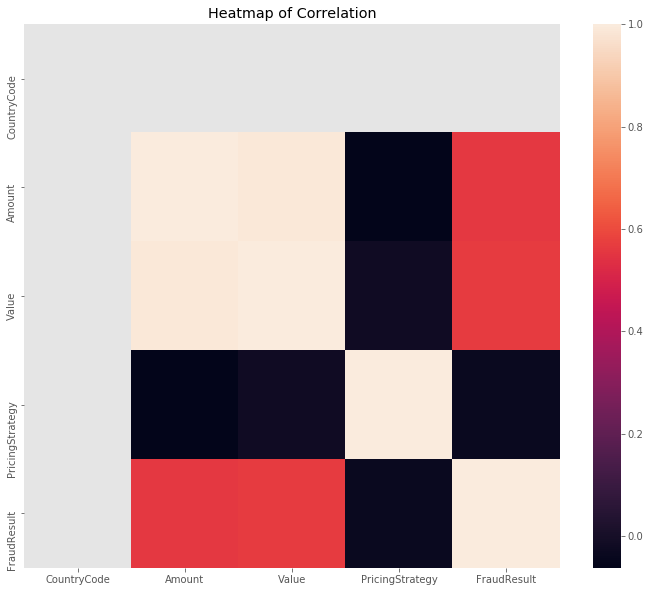

In [22]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [0]:
X = df.iloc[:, :-1]

y = df.iloc[:, 4]


In [0]:
df = df.drop(['TransactionStartTime'], axis=1)

In [25]:
df.nunique()

TransactionId      95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CustomerId          3742
CurrencyCode           1
CountryCode            1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
Amount              1676
Value               1517
PricingStrategy        4
FraudResult            2
dtype: int64

In [0]:
from sklearn.preprocessing import OneHotEncoder

categorical = ['ChannelId']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [0]:
df.drop(['BatchId', 'AccountId', 'SubscriptionId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'Value', 'PricingStrategy' ], axis=1, inplace=True)

In [44]:
df.head()

,TransactionId,CustomerId,ProductCategory,Amount,FraudResult,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,CustomerId_4406,airtime,1000.0,0,0,0,1,0
1,TransactionId_73770,CustomerId_4406,financial_services,-20.0,0,0,1,0,0
2,TransactionId_26203,CustomerId_4683,airtime,500.0,0,0,0,1,0
3,TransactionId_380,CustomerId_988,utility_bill,20000.0,0,0,0,1,0
4,TransactionId_28195,CustomerId_988,financial_services,-644.0,0,0,1,0,0


In [57]:
df.drop('ChannelId_ChannelId_5', axis=1)


,TransactionId,CustomerId,ProductCategory,Amount,FraudResult,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3
0,TransactionId_76871,CustomerId_4406,airtime,1000.0,0,0,0,1
1,TransactionId_73770,CustomerId_4406,financial_services,-20.0,0,0,1,0
2,TransactionId_26203,CustomerId_4683,airtime,500.0,0,0,0,1
3,TransactionId_380,CustomerId_988,utility_bill,20000.0,0,0,0,1
4,TransactionId_28195,CustomerId_988,financial_services,-644.0,0,0,1,0
5,TransactionId_23223,CustomerId_1432,airtime,2000.0,0,0,0,1
6,TransactionId_118063,CustomerId_2858,airtime,10000.0,0,0,0,1
7,TransactionId_100640,CustomerId_2858,financial_services,-500.0,0,0,1,0
8,TransactionId_51905,CustomerId_598,airtime,500.0,0,0,0,1
9,TransactionId_130161,CustomerId_1053,financial_services,600.0,0,0,0,1


In [47]:
df.head()

,TransactionId,CustomerId,ProductCategory,Amount,FraudResult,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,CustomerId_4406,airtime,1000.0,0,0,0,1,0
1,TransactionId_73770,CustomerId_4406,financial_services,-20.0,0,0,1,0,0
2,TransactionId_26203,CustomerId_4683,airtime,500.0,0,0,0,1,0
3,TransactionId_380,CustomerId_988,utility_bill,20000.0,0,0,0,1,0
4,TransactionId_28195,CustomerId_988,financial_services,-644.0,0,0,1,0,0


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df['ProductCategory'])


array([0, 2, 0, ..., 2, 7, 2])

In [0]:
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])


In [49]:
df.head()

,TransactionId,CustomerId,ProductCategory,Amount,FraudResult,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,CustomerId_4406,airtime,1000.0,0,0,0,1,0
1,TransactionId_73770,CustomerId_4406,financial_services,-20.0,0,0,1,0,0
2,TransactionId_26203,CustomerId_4683,airtime,500.0,0,0,0,1,0
3,TransactionId_380,CustomerId_988,utility_bill,20000.0,0,0,0,1,0
4,TransactionId_28195,CustomerId_988,financial_services,-644.0,0,0,1,0,0


In [0]:
X = df.drop(['FraudResult', 'CustomerId', 'TransactionId'], axis=1)

y = df['FraudResult']


In [27]:
print(X.shape)
print(y.shape)

(95662, 15)
(95662,)


In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [80]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958819 (0.053174)
LDA: 0.963021 (0.048751)
KNN: 0.934810 (0.037770)
CART: 0.971288 (0.025724)
SVM: 0.908394 (0.048137)
XGB: 0.989707 (0.020122)
RF: 0.977224 (0.025420)


In [82]:
RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       1.00      0.92      0.96        36

    accuracy                           1.00     19133
   macro avg       1.00      0.96      0.98     19133
weighted avg       1.00      1.00      1.00     19133

[[19097     0]
 [    3    33]]
